## Write my own 

In [76]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
% matplotlib inline
import random
import os, sys


# Set to your datasets folder
path = "E:\AnacondaProject\ACF"
retval = os.getcwd()
print ('****** Please set to your datasets folder, and including  ******')
print ("Original Work Dir:%s" % retval)
os.chdir(path)
retval = os.getcwd()
print("Change to Current Dir:%s" % retval)

****** Please set to your datasets folder, and including  ******
Original Work Dir:E:\AnacondaProject\ACF
Change to Current Dir:E:\AnacondaProject\ACF


In [2]:
def FeatureChannels = ComptChannels(Orig_Img)

'''
% 获得原图像的相应十幅特征图
% 输入：原图像，opencv读入BGR, h*w*3
% 输出：特征图像：m*n*10
% 3*LUV + gradMag + 6*gradHist
% color:HSV
% gradMag:RGB
% gradHist:RGB
'''
#featureImag = zeros(floor(size(RGBoriginalImag, 1)/4), floor(size(RGBoriginalImag, 2)/4), 10, 'single');
#颜色特征
h = Orig_Img.shape[0]
w = Orig_Img.shape[1]
chnl = 10
FeatureChannels = np.empty((h, w, chnl))
#print(FeatureChannels.shape)

# 原始RGB图像
# RGBoriginalImag = im2single(RGBoriginalImag);
# 应该用不到 
# RGB_Img = cv2.cvtColor(Orig_Img,cv2.COLOR_BGR2RGB)
# RGB_Img = cv2.normalize(Orig_Img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
# print(RGBoriginalImag_double.shape,RGBoriginalImag_double.dtype)

# LUV通道
# HSVoriginalImag = rgb2hsv(RGBoriginalImag);
# featureImag(:,:,1) = subSampling(HSVoriginalImag(:,:,1), 4);
# featureImag(:,:,2) = subSampling(HSVoriginalImag(:,:,2), 4);
# featureImag(:,:,3) = subSampling(HSVoriginalImag(:,:,3), 4);
LUV_Img = cv2.cvtColor(Orig_Img,cv2.COLOR_BGR2LUV)
FeatureChannels[:,:,0:3] = LUV_Img[:,:,:]


# 梯度特征
# [M, O] = gradientMag(RGBoriginalImag, [], [], [], []);
# featureImag(:,:,4) = subSampling(M, 4);



# HoG特征 
# [M,O] = gradientMag(RGBoriginalImag, 3);
#featureImag(:,:,5:10)=gradientHist(M,O,4,6); 
# figure; montage2(H1);

SyntaxError: invalid syntax (<ipython-input-2-80018a038b62>, line 1)

FeatureChannels:  (160, 80, 10)


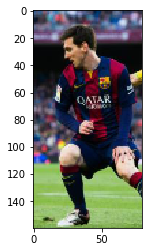

In [65]:
img = cv2.imread('messi5.jpg')
Orig_Img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
Crop_img = Orig_Img[:,150:300,:]
inputsize = (80,160)
Crop_img =cv2.resize(Crop_img,inputsize)
plt.imshow(Crop_img)

h = Crop_img.shape[0]
w = Crop_img.shape[1]
chnl = 10
FeatureChannels = np.empty((h, w, chnl))
print('FeatureChannels: ',FeatureChannels.shape)

#原始RGB图像
# RGBoriginalImag = im2single(RGBoriginalImag);
RGB_Img = cv2.normalize(Orig_Img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
#print('RGB_Img:',RGBoriginalImag_double.shape,RGBoriginalImag_double.dtype)


(<matplotlib.axes._subplots.AxesSubplot at 0x14ff77c02e8>,
 <matplotlib.image.AxesImage at 0x14ff777d9b0>)

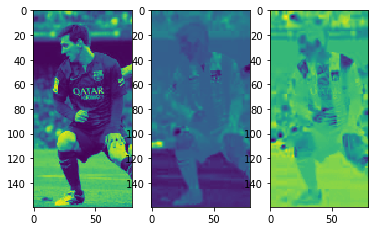

In [66]:
# LUV通道
LUV_Img = cv2.cvtColor(Crop_img,cv2.COLOR_BGR2LUV)
FeatureChannels[:,:,0:3] = LUV_Img[:,:,:]

plt.subplot(131), plt.imshow(LUV_Img[:,:,0])
plt.subplot(132), plt.imshow(LUV_Img[:,:,1])
plt.subplot(133), plt.imshow(LUV_Img[:,:,2])

Magnitude: (160, 80) Gadient: (160, 80)
[ 90.         168.02331967 167.47039785 135.00954366   0.
   0.           0.          44.99045634  63.43289657  90.
 116.56710343 135.00954366   0.           0.           0.
   0.           0.          44.99045634  63.43289657  78.68979429
 246.79718699 258.68979429 349.24896906  18.33595479  32.76248807
  54.546751    61.34396089  39.19959416 354.76494907 331.87057314
 320.07884349 279.00746974 236.7682173  231.3855263  239.3394834
 273.13576214 318.10081927 332.81296962 330.66500631 311.05228855
 292.62422331 322.07281381 343.17759634 346.44374485 330.40310782
 209.16012693 215.01804676 219.38236953 219.37575681 221.83400122
 259.09798333 305.5565443  277.18352081 245.12404456 253.12071832
 266.2807974  259.16809237 256.51568659 251.56132286 223.59245654
 273.17922755 314.4351274  315.26408156  35.1514745   83.6606091
  96.87404563 116.08338473 130.06273059 135.60122383 136.23944015
 141.79251467 144.11851097  60.6436384   37.05061853  75.96222

(<matplotlib.axes._subplots.AxesSubplot at 0x14ff70f2978>,
 <matplotlib.image.AxesImage at 0x14ff69a3d30>)

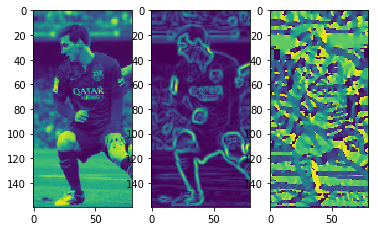

In [67]:
# Gradient Magnitude 梯度幅度特征
Gray_Img = cv2.cvtColor(Crop_img,cv2.COLOR_BGR2GRAY)
gradient_values_x = cv2.Sobel(Gray_Img, cv2.CV_64F, 1, 0, ksize=5)
gradient_values_y = cv2.Sobel(Gray_Img, cv2.CV_64F, 0, 1, ksize=5)
#计算角度和幅值
gradient_magnitude, gradient_angle = cv2.cartToPolar(gradient_values_x, gradient_values_y, angleInDegrees=True)
print('Magnitude:',gradient_magnitude.shape, 'Gadient:', gradient_angle.shape)
print(gradient_angle[40,:])

FeatureChannels[:,:,3] = gradient_magnitude[:,:]

plt.subplot(131), plt.imshow(Gray_Img)
plt.subplot(132), plt.imshow(gradient_magnitude)
plt.subplot(133), plt.imshow(gradient_angle)

Gray Image Size: (160, 80)
Cell Size: 4 x 4
#Height Cell: 40 #Width Cell: 20
#Bins:  6 , AngleUnit:  60
Histo of All Cells: (40, 20, 6)
Histo of a Cell i: (6,)
[    0.             0.             0.          2587.8355438
 36154.35938527  1006.65750522]


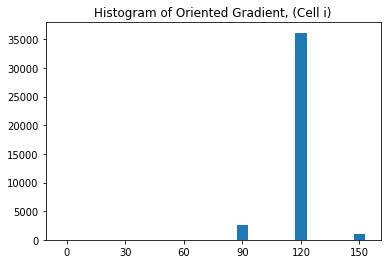

In [71]:
# Gradient Histograms 梯度直方图特征
# 划分为4x4的cell，每个cell里求Hist of Gradient 梯度直方图
height, width = Gray_Img.shape
print('Gray Image Size:',Gray_Img.shape)

cell_size = np.int(4)
print('Cell Size:',cell_size,'x',cell_size)
hcell = int(np.ceil(height / cell_size))
wcell = int(np.ceil(width / cell_size))
print('#Height Cell:',hcell,'#Width Cell:',wcell )

bin_size = np.int(6)
angle_unit = int(360/bin_size)
print('#Bins: ',bin_size,', AngleUnit: ',angle_unit)
gradient_magnitude = abs(gradient_magnitude)


# 一个cell由4x4的像素组成
# 用于存储每个Cell的Gradient Histo
cell_gradient_vector = np.zeros((hcell, wcell, bin_size))

def cell_gradient(cell_magnitude, cell_angle):
    orientation_centers = [0] * bin_size
    
    for k in range(cell_magnitude.shape[0]):
        for l in range(cell_magnitude.shape[1]):
            #在每个cell中，根据角度信息，向对应的Bin累加mag
            gradient_strength = cell_magnitude[k][l]
            gradient_angle = cell_angle[k][l]
            # 对6取余
            min_angle = int(gradient_angle / angle_unit)% 6
            max_angle = (min_angle + 1) % bin_size
            mod = gradient_angle % angle_unit
            # 根据权重，一部分累计角度所在的Bin,和下一个Bin
            orientation_centers[min_angle] += (gradient_strength * (1 - (mod / angle_unit)))
            orientation_centers[max_angle] += (gradient_strength * (mod / angle_unit))
    return orientation_centers

#遍历每个20x20的每个cell，统计Gradient Histo
for i in range(cell_gradient_vector.shape[0]):
    for j in range(cell_gradient_vector.shape[1]):
        
        # Index获取此cell的Gradient幅值和角度
        cell_magnitude = gradient_magnitude[i * cell_size:(i + 1) * cell_size,j * cell_size:(j + 1) * cell_size]
        cell_angle = gradient_angle[i * cell_size:(i + 1) * cell_size,j * cell_size:(j + 1) * cell_size]
        #print(cell_angle.max())
        
        # 计算此Cell的Gradient Histo
        cell_gradient_vector[i][j] = cell_gradient(cell_magnitude, cell_angle)

        # 分配6个Bin至Feature Channel的4-9的6个通道
        for n in range (bin_size):
            cell_hist_copy = np.ones((cell_size,cell_size)) * cell_gradient_vector[i,j,n]
            #print(cell_hist_copy)
            FeatureChannels[i * cell_size:(i + 1) * cell_size,j * cell_size:(j + 1) * cell_size,n+4] = cell_hist_copy
        
print('Histo of All Cells:',cell_gradient_vector.shape)
#print(cell_gradient_vector)

# 某一个Cell的梯度向量示例
hist_cell_i = cell_gradient_vector[3,6,:]
print('Histo of a Cell i:',hist_cell_i.shape)
print(hist_cell_i)
hist_y = np.array([0,30,60,90,120,150])
fig, ax = plt.subplots()
ax.bar(hist_y,hist_cell_i,6)
ax.set_title('Histogram of Oriented Gradient, (Cell i)')
ax.set_xticks([0,30,60,90,120,150])
plt.show()

##Feature Vectorization

In [72]:
print(FeatureChannels.shape)
print(FeatureChannels[4:10,4:10,6])

(160, 80, 10)
[[  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [10641.58168994 10641.58168994 10641.58168994 10641.58168994
   1527.58561227  1527.58561227]
 [10641.58168994 10641.58168994 10641.58168994 10641.58168994
   1527.58561227  1527.58561227]]


In [79]:
NormFeatureChannels = np.empty(FeatureChannels.shape)
cv2.normalize(FeatureChannels,  NormFeatureChannels, 0, 1, cv2.NORM_MINMAX)
print(FeatureChannels.shape)
print(FeatureChannels[4:10,4:10,6])
print(NormFeatureChannels.shape)
print(NormFeatureChannels[4:10,4:10,6])

(160, 80, 10)
[[  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [  206.32539829   206.32539829   206.32539829   206.32539829
      0.             0.        ]
 [10641.58168994 10641.58168994 10641.58168994 10641.58168994
   1527.58561227  1527.58561227]
 [10641.58168994 10641.58168994 10641.58168994 10641.58168994
   1527.58561227  1527.58561227]]
(160, 80, 10)
[[0.00247087 0.00247087 0.00247087 0.00247087 0.         0.        ]
 [0.00247087 0.00247087 0.00247087 0.00247087 0.         0.        ]
 [0.00247087 0.00247087 0.00247087 0.00247087 0.         0.        ]
 [0.00247087 0.00247087 0.00247087 0.00247087 0.         0.        ]
 [0.12743953 0.12743953 0.12743953 0.12743953 0.01829378 0.01829378]
 [0.12743953 0.12743953 0.12743953 0.12743953 0.01829378

In [84]:
# Sub sampling & Vectorization
SubChannels = cv2.resize(NormFeatureChannels,(20,40),interpolation=cv2.INTER_CUBIC)
print(SubChannels.shape)
print(SubChannels[4:10,4:10,6])

(40, 20, 10)
[[1.18315490e-01 0.00000000e+00 5.11493137e-02 1.28358453e-01
  1.02767455e-03 0.00000000e+00]
 [0.00000000e+00 1.77951622e-02 1.13595190e-01 1.50872838e-01
  4.57365218e-05 1.59417299e-01]
 [0.00000000e+00 0.00000000e+00 1.43643116e-02 5.61422163e-01
  3.60518883e-01 1.57099941e-01]
 [0.00000000e+00 0.00000000e+00 1.32956636e-01 5.43099425e-03
  7.15156651e-02 3.08846529e-02]
 [0.00000000e+00 7.57965995e-05 0.00000000e+00 1.27026137e-02
  9.49110487e-03 3.03360695e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.57338626e-05 0.00000000e+00]]


In [87]:
#AcfVec = SubChannels.reshape(SubChannels.shape[0]*SubChannels.shape[1]*SubChannels.shape[2])
AcfVec = SubChannels.reshape(-1)
print(AcfVec.shape)

(8000,)
